In [11]:
import pandas as pd
import numpy as np


In [15]:
df = pd.read_csv('sample.csv')

In [16]:
df.head()

,Keywords,Label
0,yeah,NN
1,deaf,VB
2,heard,VBD
3,occurred,VBD
4,keep,VB


In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, TimeDistributed, Flatten, Concatenate, Dot, Activation




# Preprocess the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Keywords'])
sequences = tokenizer.texts_to_sequences(df['Keywords'])
vocab_size = len(tokenizer.word_index) + 1
max_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_len, padding='post')
y = LabelEncoder().fit_transform(df['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the RNN model with attention
def build_model(units=64, optimizer='adam'):
    input_layer = Input(shape=(max_len,))
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=32)(input_layer)
    lstm_layer = Bidirectional(LSTM(units, return_sequences=True))(embedding_layer)
    attention = TimeDistributed(Dense(1, activation='tanh'))(lstm_layer)
    attention = Flatten()(attention)
    attention = Activation('softmax')(attention)
    attention = Dot(axes=1)([lstm_layer, attention])
    output_layer = Dense(50, activation='softmax')(attention)  
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define hyperparameters to tune
param_grid = {
    'units': [128],
    'optimizer': ['adam'],
}

# Create the model
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train, epochs= 10, batch_size=16)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))


C:\Users\vashu\AppData\Local\Temp\ipykernel_16652\171776963.py:48: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_model)


Epoch 1/10
3/3 [==============================] - 6s 8ms/step - loss: 3.9091 - accuracy: 0.1944
Epoch 2/10
3/3 [==============================] - 0s 9ms/step - loss: 3.8965 - accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 10ms/step - loss: 3.8837 - accuracy: 0.4722
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: 3.8701 - accuracy: 0.4722
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 3.8552 - accuracy: 0.4444
Epoch 6/10
3/3 [==============================] - 0s 10ms/step - loss: 3.8378 - accuracy: 0.4444
Epoch 7/10
3/3 [==============================] - 0s 8ms/step - loss: 3.8184 - accuracy: 0.4444
Epoch 8/10
3/3 [==============================] - 0s 9ms/step - loss: 3.7960 - accuracy: 0.4444
Epoch 9/10
3/3 [==============================] - 0s 9ms/step - loss: 3.7714 - accuracy: 0.4444
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 3.7768 - accuracy: 0.1053
Epoch 1/10
3/3 [=====================

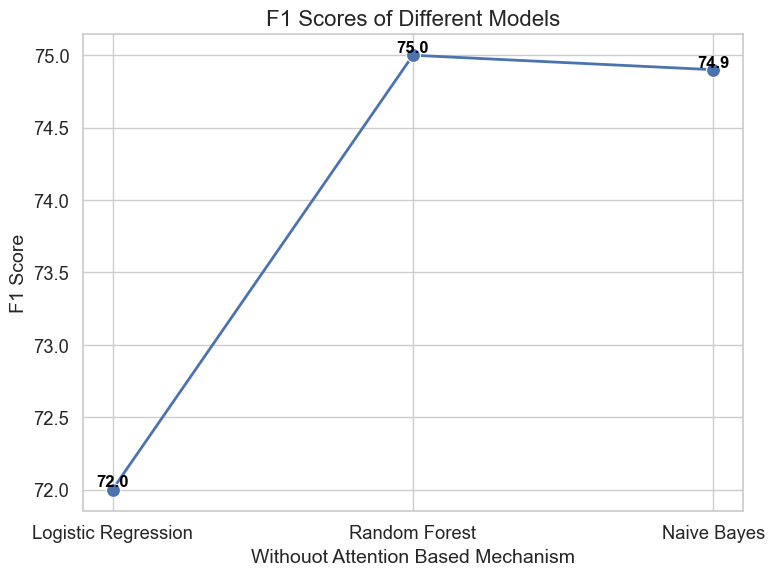

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# F1 scores for different models
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes']
f1_scores = [72, 75, 74.9]

# Set Seaborn style
sns.set(style='whitegrid', font_scale=1.2)

# Create a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=models, y=f1_scores, marker='o', markersize=10, color='b', linewidth=2)

# Add data points as text labels
for i, score in enumerate(f1_scores):
    plt.text(i, score, f'{score:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Set the title and labels
plt.title('F1 Scores of Different Models', fontsize=16)
plt.xlabel('Withouot Attention Based Mechanism', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


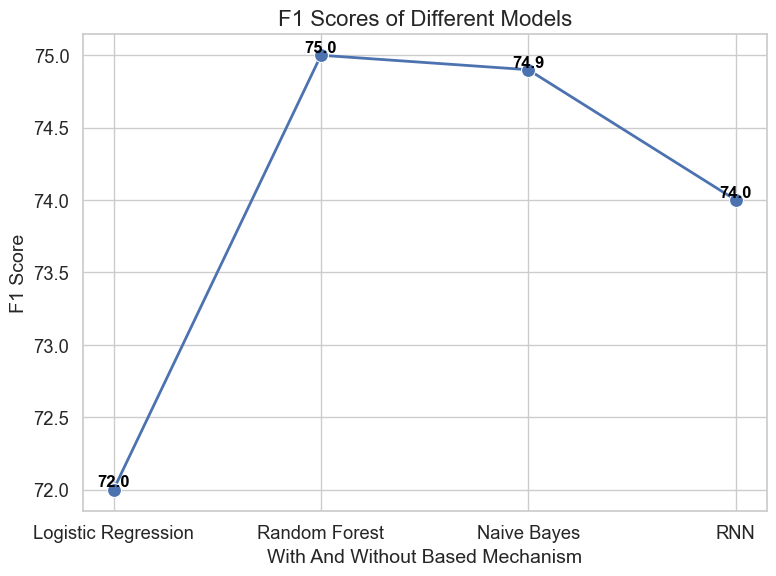

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# F1 scores for different models
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'RNN']
f1_scores = [72, 75, 74.9, 74]

# Set Seaborn style
sns.set(style='whitegrid', font_scale=1.2)

# Create a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x=models, y=f1_scores, marker='o', markersize=10, color='b', linewidth=2)

# Add data points as text labels
for i, score in enumerate(f1_scores):
    plt.text(i, score, f'{score:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Set the title and labels
plt.title('F1 Scores of Different Models', fontsize=16)
plt.xlabel('With And Without Based Mechanism', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
